# Challenge 3

In [1]:
# import libraries here
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Import the titanic file. Name your dataset `titanic`.

In [2]:
titanic = pd.read_csv('./titanic.csv',low_memory=False)



#### Explore the titanic dataset using Pandas dtypes

In [3]:
titanic.dtypes


PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?

*Hint: Use Pandas `select_dtypes`*

In [4]:
titanic.select_dtypes(include=['number']).columns



Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [5]:
titanic.select_dtypes(include=['object']).columns

Index(['Name', 'Gender', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

#### Set the plot style to `classic` and the figure size to `(12,6)`

*Hint: To set the style you can use `matplotlib.pyplot` functions or seaborn*

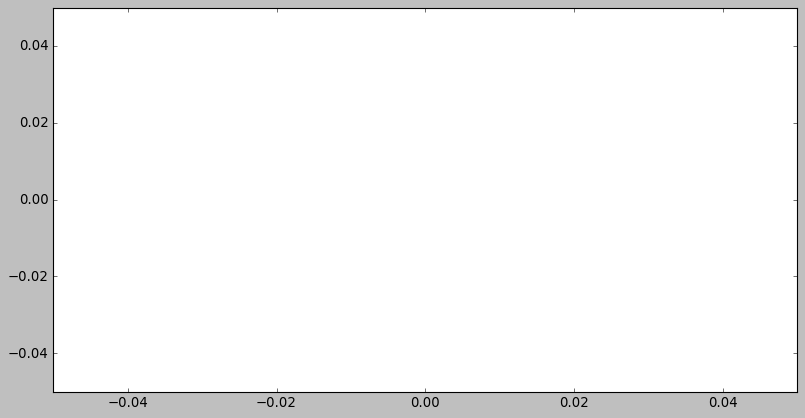

In [6]:
with plt.style.context('classic'):
    plt.figure(figsize=(12,6))
    plt.plot()

#### Use the appropriate visulalization to show the distribution of the column `Age`

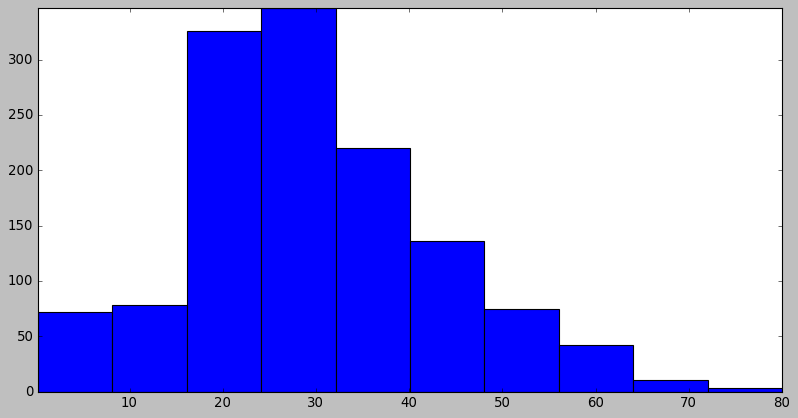

In [7]:
age = titanic["Age"]
with plt.style.context('classic'):
    plt.figure(figsize=(12,6))
    plt.hist(age)
    



#### Use subplots to plot the distribution of the `Age` variable with bins equal to `10`, `20` and `50`.

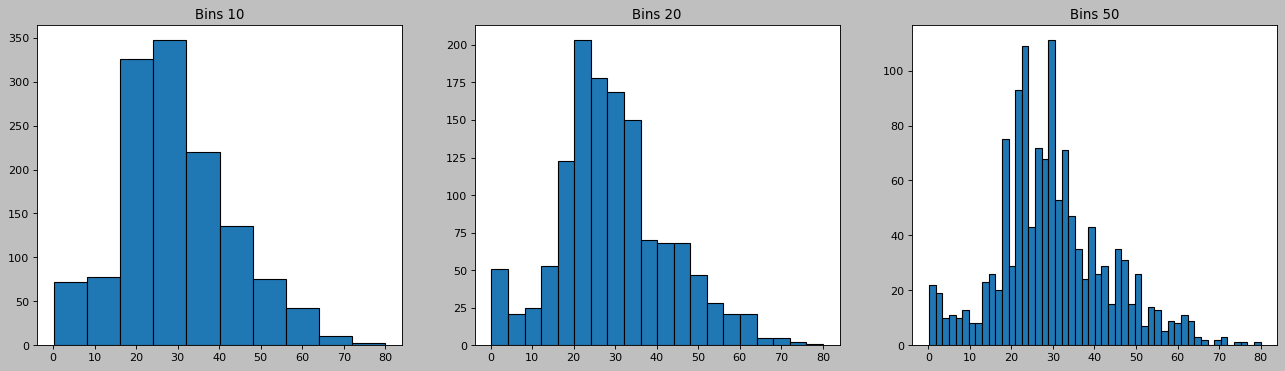

In [8]:

with plt.style.context('classic'):
    plt.figure(figsize=(20,5))
    plt.hist(age)

plt.subplot(1,3,1)
plt.hist(age, bins = 10, edgecolor = "black")
plt.title("Bins 10")

plt.subplot(1,3,2)
plt.hist(age, bins = 20, edgecolor = "black")
plt.title("Bins 20")

plt.subplot(1,3,3)
plt.hist(age, bins = 50, edgecolor = "black")
plt.title("Bins 50")



plt.show()





#### Whether the bin size affects your plot? Why?

In [9]:
#Disminuye el rango del eje y al haber una distribución más amplia de las edades.


#### Use seaborn to show the distribution of the column `Age`

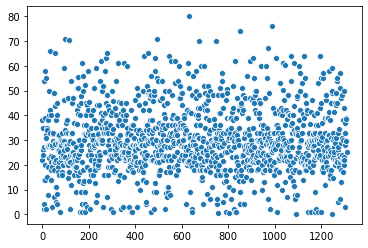

In [10]:


sns.scatterplot(data=age)
plt.show()



#### Use the appropriate plot to visualize the column `Gender`. There are 2 ways of doing it. Do it both ways.

*Hint: Use matplotlib and seaborn*

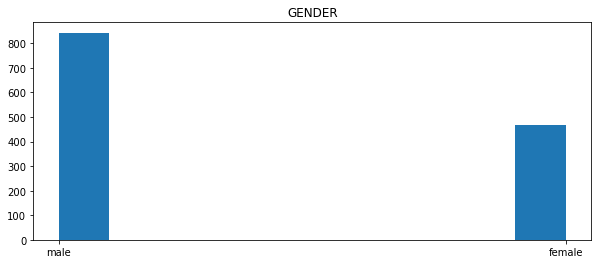

In [11]:
Gender = titanic["Gender"]


plt.figure(figsize=(10,4))
plt.title("GENDER")
plt.hist(Gender)

plt.show()


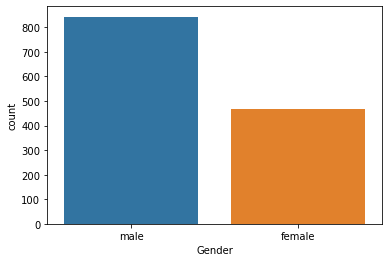

In [12]:
sns.countplot(Gender)
plt.show()

#### Use the appropriate plot to visualize the column `Pclass` 


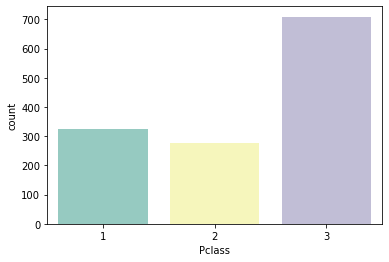

In [48]:
Pclass = titanic["Pclass"]
sns.countplot(Pclass, palette ="Set3")
plt.show()




#### We would like to have in one single plot the summary statistics of the feature `Age`. Choose the appropriate plot to show below.

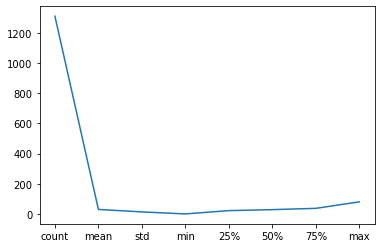

In [16]:
age = titanic["Age"].describe()


age.plot()

plt.show()




#### What does the previous plot tell you about the feature `Age`? Comment.

In [17]:
"""donde mas alta esta la gráfica es en el recuento de las filas, es decir de los pasajeros,logicamente, que tiene que ser
el más alto.
"""


'donde mas alta esta la gráfica es en el recuento de las filas, es decir de los pasajeros,logicamente, que tiene que ser\nel más alto.\n'

#### Now in addition to the summary statistics, we also want to visualize the distribution of `Age`. Choose the appropriate plot to sow below.

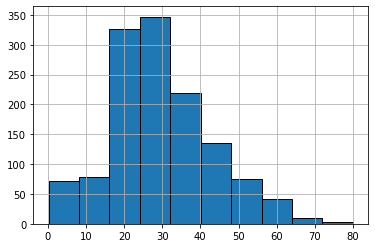

In [18]:
#nose si se pide otra cosa pero creo que ya la hice en el ejercicio anterior.

age = titanic["Age"]
age.hist(bins = 10, edgecolor="black")

plt.show()


#### What additional information in the previous plot provide you about the feature `Age`? Comment.

In [19]:
#Ni idea


#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the appropriate plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.

*Hint: One of the ways involves using Seaborn*

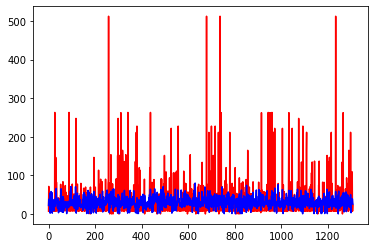

In [51]:
x = titanic["Fare"]
y = titanic["Age"]
z = np.linspace(-50,50,100)
plt.plot(x, color = "red")
plt.plot(y, color = "blue")
plt.show()
#Quiero llegar a este punto que dudo muchas veces si convertir los x e y en dataframe o no hace falta, no lo se.

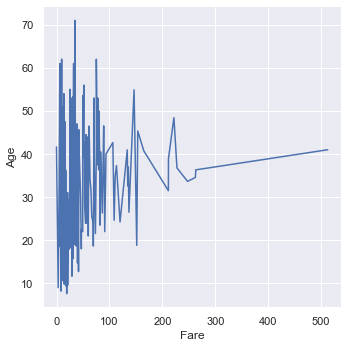

In [69]:

sns.set()
sns.relplot(x = "Fare", y = "Age", data = titanic, kind = "line", ci = None)

#### Using Seaborn plot the correlation matrix of various features.

*Hint: search how to use `heatmap`*

#### According to the previous plot, what are the most correlated feature? Comment.

In [ ]:
#your comment here


#### Use the appropriate plot to display the summary statistics of the `Age` in function of the `Pclass`.

*Hint: use boxplot to display summary statistics of `Age` in relation to each of the discrete values of `Pclass`*

In [ ]:
#your code here


#### Use the appropriate plot to display the distributions of  `Age` in relation to  `Gender`.

*Hint: use Facetgrid to display the distribution of `Age` for each categorical value of `Gender`*

In [ ]:
#your code here
